In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

In [2]:
import numpy as np
import torch
from torch.quasirandom import SobolEngine
tkwargs = {"dtype": torch.double,
#            "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
           "device": torch.device("cpu")
          }
from botorch.models.transforms.outcome import Standardize
import matplotlib.pyplot as plt
from MAB_BO_utils import *

In [3]:
# global parameters

d = 5
m = 2*(d+1)
C = 5
BOUNDS = torch.tensor([[-1.0]*(d), [3.0]*(d)]).to(**tkwargs)


N_CANDIDATES = 1
SAMPLER = 'cholesky'
N_SAMPLES = 10000

N_TRIALS = 3
N_ITERS = 100

In [4]:
NU = 1.5

# BO LOOP

best_values = torch.empty(N_TRIALS, N_ITERS + 1, **tkwargs)

for t in range(N_TRIALS):
    
    # generate starting dataset
    train_X = generate_X(m, C, BOUNDS, seed=t).to(**tkwargs)
    train_y = modified_neg_ackley(train_X).to(**tkwargs)
    best_values[t, 0] = train_y.max().item()

    
    for i in range(1, N_ITERS + 1):
        
        print(f"trial {t+1}/{N_TRIALS} | iteration {i}/{N_ITERS}")
    
        # normalize X 
        train_X_normalized = normalize_with_bounds(train_X, BOUNDS)
#         # standardize y
#         standardizer = Standardize(1)
#         train_y_standardized = standardizer(train_y)[0]

        # initialize model
        models = initialize_models(train_X_normalized, train_y, nu=NU, sampler=SAMPLER)
        
        # get candidates
        new_X = get_candidates(models, d, N_CANDIDATES, N_SAMPLES, sampler=SAMPLER)
        
        # denormalize candidates
        new_X = denormalize_with_bounds(new_X, BOUNDS)
        
        # evaluate objective
        new_y = modified_neg_ackley(new_X)
        
        # update train_X and train_y
        train_X = torch.cat([train_X, new_X], dim=0)
        train_y = torch.cat([train_y, new_y], dim=0)
        
        # update best values
        best = train_y.max().item()
        print(f"best = {best}")
        best_values[t, i] = best

trial 1/3 | iteration 1/100
picked category: 1 | sampled posterior value = -3.742960932544572
best = -4.129622639476402
trial 1/3 | iteration 2/100
picked category: 4 | sampled posterior value = -5.4452765376307
best = -4.129622639476402
trial 1/3 | iteration 3/100
picked category: 4 | sampled posterior value = -5.443377931394568
best = -4.129622639476402
trial 1/3 | iteration 4/100
picked category: 4 | sampled posterior value = -5.441960703686932
best = -4.129622639476402
trial 1/3 | iteration 5/100
picked category: 4 | sampled posterior value = -5.431407422868432
best = -4.129622639476402
trial 1/3 | iteration 6/100
picked category: 4 | sampled posterior value = -5.537131223761938
best = -4.129622639476402
trial 1/3 | iteration 7/100
picked category: 4 | sampled posterior value = -5.530829144582005
best = -4.129622639476402
trial 1/3 | iteration 8/100
picked category: 1 | sampled posterior value = -3.8810509256664933
best = -3.4599246237509473
trial 1/3 | iteration 9/100
picked categ

picked category: 4 | sampled posterior value = -2.3699254430966588
best = -0.4430340919806999
trial 1/3 | iteration 69/100
picked category: 4 | sampled posterior value = -2.322944576786491
best = -0.4430340919806999
trial 1/3 | iteration 70/100
picked category: 4 | sampled posterior value = -2.287833728690425
best = -0.4430340919806999
trial 1/3 | iteration 71/100
picked category: 4 | sampled posterior value = -2.2503565595882087
best = -0.4430340919806999
trial 1/3 | iteration 72/100
picked category: 4 | sampled posterior value = -2.4661315696699697
best = -0.4430340919806999
trial 1/3 | iteration 73/100
picked category: 4 | sampled posterior value = -2.2245075539056964
best = -0.4430340919806999
trial 1/3 | iteration 74/100
picked category: 4 | sampled posterior value = -2.2726568183255043
best = -0.4430340919806999
trial 1/3 | iteration 75/100
picked category: 4 | sampled posterior value = -2.222997815759963
best = -0.4430340919806999
trial 1/3 | iteration 76/100
picked category: 4 

picked category: 4 | sampled posterior value = -1.2250941140484093
best = -1.7037993101878297
trial 2/3 | iteration 36/100
picked category: 4 | sampled posterior value = -1.5818013123806334
best = -1.7037993101878297
trial 2/3 | iteration 37/100
picked category: 4 | sampled posterior value = -1.6591585570783232
best = -1.7037993101878297
trial 2/3 | iteration 38/100
picked category: 4 | sampled posterior value = -2.308112436725724
best = -1.7037993101878297
trial 2/3 | iteration 39/100
picked category: 4 | sampled posterior value = -1.7434641997415956
best = -1.7037993101878297
trial 2/3 | iteration 40/100
picked category: 4 | sampled posterior value = -1.5589742471082424
best = -1.5358663969928625
trial 2/3 | iteration 41/100
picked category: 4 | sampled posterior value = -1.9774663315016
best = -1.5358663969928625
trial 2/3 | iteration 42/100
picked category: 4 | sampled posterior value = -1.698702561036764
best = -1.1295406545794617
trial 2/3 | iteration 43/100
picked category: 4 | 

picked category: 4 | sampled posterior value = -5.16156709529785
best = -3.605986909925861
trial 3/3 | iteration 3/100
picked category: 4 | sampled posterior value = -5.246322934921927
best = -3.605986909925861
trial 3/3 | iteration 4/100
picked category: 4 | sampled posterior value = -5.388592754694765
best = -3.605986909925861
trial 3/3 | iteration 5/100
picked category: 4 | sampled posterior value = -5.337661398852366
best = -3.605986909925861
trial 3/3 | iteration 6/100
picked category: 3 | sampled posterior value = -4.637402552964687
best = -3.605986909925861
trial 3/3 | iteration 7/100
picked category: 3 | sampled posterior value = -4.674543773354106
best = -3.605986909925861
trial 3/3 | iteration 8/100
picked category: 4 | sampled posterior value = -3.8983936023274914
best = -3.313962548788109
trial 3/3 | iteration 9/100
picked category: 3 | sampled posterior value = -2.9632096863390514
best = -3.313962548788109
trial 3/3 | iteration 10/100
picked category: 4 | sampled posterior

picked category: 4 | sampled posterior value = -4.342528899954884
best = -3.2443839177418856
trial 3/3 | iteration 71/100
picked category: 4 | sampled posterior value = -4.103289135701437
best = -3.2443839177418856
trial 3/3 | iteration 72/100
picked category: 4 | sampled posterior value = -4.508974410334468
best = -3.2443839177418856
trial 3/3 | iteration 73/100
picked category: 3 | sampled posterior value = -4.51359369106865
best = -3.2443839177418856
trial 3/3 | iteration 74/100
picked category: 4 | sampled posterior value = -4.251794827266828
best = -3.2443839177418856
trial 3/3 | iteration 75/100
picked category: 4 | sampled posterior value = -4.386222954576385
best = -3.2443839177418856
trial 3/3 | iteration 76/100
picked category: 4 | sampled posterior value = -4.308488812803002
best = -3.2443839177418856
trial 3/3 | iteration 77/100
picked category: 4 | sampled posterior value = -4.122065505213516
best = -3.2443839177418856
trial 3/3 | iteration 78/100
picked category: 4 | samp

In [5]:
NU = 0.5

# BO LOOP

best_values_2 = torch.empty(N_TRIALS, N_ITERS + 1, **tkwargs)

for t in range(N_TRIALS):
    
    # generate starting dataset
    train_X = generate_X(m, C, BOUNDS, seed=t).to(**tkwargs)
    train_y = modified_neg_ackley(train_X).to(**tkwargs)
    best_values_2[t, 0] = train_y.max().item()

    
    for i in range(1, N_ITERS + 1):
        
        print(f"trial {t+1}/{N_TRIALS} | iteration {i}/{N_ITERS}")
    
        # normalize X 
        train_X_normalized = normalize_with_bounds(train_X, BOUNDS)
#         # standardize y
#         standardizer = Standardize(1)
#         train_y_standardized = standardizer(train_y)[0]

        # initialize model
        models = initialize_models(train_X_normalized, train_y, nu=NU, sampler=SAMPLER)
        
        # get candidates
        new_X = get_candidates(models, d, N_CANDIDATES, N_SAMPLES, sampler=SAMPLER)
        
        # denormalize candidates
        new_X = denormalize_with_bounds(new_X, BOUNDS)
        
        # evaluate objective
        new_y = modified_neg_ackley(new_X)
        
        # update train_X and train_y
        train_X = torch.cat([train_X, new_X], dim=0)
        train_y = torch.cat([train_y, new_y], dim=0)
        
        # update best values
        best = train_y.max().item()
        print(f"best = {best}")
        best_values_2[t, i] = best

trial 1/3 | iteration 1/100
picked category: 4 | sampled posterior value = -4.203433589586444
best = -4.129622639476402
trial 1/3 | iteration 2/100
picked category: 4 | sampled posterior value = -3.3884705942184055
best = -4.129622639476402
trial 1/3 | iteration 3/100
picked category: 4 | sampled posterior value = -3.488420195854248
best = -3.9407376467441146
trial 1/3 | iteration 4/100
picked category: 4 | sampled posterior value = -3.357271031954151
best = -3.7866706301593673
trial 1/3 | iteration 5/100
picked category: 4 | sampled posterior value = -2.7259408930283224
best = -3.7866706301593673
trial 1/3 | iteration 6/100
picked category: 4 | sampled posterior value = -2.966677923091844
best = -3.1467242294548794
trial 1/3 | iteration 7/100
picked category: 4 | sampled posterior value = -2.6822251691610255
best = -3.1467242294548794
trial 1/3 | iteration 8/100
picked category: 4 | sampled posterior value = -1.4960358348011114
best = -3.1467242294548794
trial 1/3 | iteration 9/100
pi

picked category: 4 | sampled posterior value = -1.6060132664869855
best = -0.4430340919806999
trial 1/3 | iteration 69/100
picked category: 4 | sampled posterior value = -1.3247715236784425
best = -0.4430340919806999
trial 1/3 | iteration 70/100
picked category: 4 | sampled posterior value = -1.2444408448941462
best = -0.4430340919806999
trial 1/3 | iteration 71/100
picked category: 4 | sampled posterior value = -1.1651469944429276
best = -0.4430340919806999
trial 1/3 | iteration 72/100
picked category: 4 | sampled posterior value = -1.4385810560641303
best = -0.4430340919806999
trial 1/3 | iteration 73/100
picked category: 4 | sampled posterior value = -1.4233201454477784
best = -0.4430340919806999
trial 1/3 | iteration 74/100
picked category: 4 | sampled posterior value = -0.8459242895449397
best = -0.4430340919806999
trial 1/3 | iteration 75/100
picked category: 4 | sampled posterior value = -1.6629627216087042
best = -0.4430340919806999
trial 1/3 | iteration 76/100
picked category:

picked category: 4 | sampled posterior value = -1.5061657801472204
best = -1.7721757334724484
trial 2/3 | iteration 36/100
picked category: 4 | sampled posterior value = -1.9151190255064887
best = -1.7721757334724484
trial 2/3 | iteration 37/100
picked category: 4 | sampled posterior value = -1.7343583592677116
best = -1.7721757334724484
trial 2/3 | iteration 38/100
picked category: 4 | sampled posterior value = -2.0866016517365518
best = -1.7721757334724484
trial 2/3 | iteration 39/100
picked category: 4 | sampled posterior value = -1.1859997394730613
best = -1.7721757334724484
trial 2/3 | iteration 40/100
picked category: 4 | sampled posterior value = -1.8094861948228675
best = -1.4804274837440023
trial 2/3 | iteration 41/100
picked category: 4 | sampled posterior value = -1.643643002097295
best = -1.4804274837440023
trial 2/3 | iteration 42/100
picked category: 4 | sampled posterior value = -1.5006309301321699
best = -1.4804274837440023
trial 2/3 | iteration 43/100
picked category: 

picked category: 3 | sampled posterior value = -3.990812808812942
best = -3.605986909925861
trial 3/3 | iteration 3/100
picked category: 3 | sampled posterior value = -3.5118404510908556
best = -3.605986909925861
trial 3/3 | iteration 4/100
picked category: 4 | sampled posterior value = -3.7285913686093837
best = -3.605986909925861
trial 3/3 | iteration 5/100
picked category: 3 | sampled posterior value = -3.8623682365552665
best = -3.605986909925861
trial 3/3 | iteration 6/100
picked category: 3 | sampled posterior value = -4.000225888947213
best = -3.605986909925861
trial 3/3 | iteration 7/100
picked category: 4 | sampled posterior value = -3.200258599496583
best = -3.605986909925861
trial 3/3 | iteration 8/100
picked category: 3 | sampled posterior value = -3.5929795227784322
best = -2.8686391097069834
trial 3/3 | iteration 9/100
picked category: 3 | sampled posterior value = -3.761776407625728
best = -2.8686391097069834
trial 3/3 | iteration 10/100
picked category: 3 | sampled post

picked category: 3 | sampled posterior value = -2.6051425397146533
best = -2.569696195981962
trial 3/3 | iteration 71/100
picked category: 3 | sampled posterior value = -2.429372727858238
best = -2.569696195981962
trial 3/3 | iteration 72/100
picked category: 3 | sampled posterior value = -2.645956222272363
best = -2.569696195981962
trial 3/3 | iteration 73/100
picked category: 4 | sampled posterior value = -3.5117623745960005
best = -2.569696195981962
trial 3/3 | iteration 74/100
picked category: 3 | sampled posterior value = -2.688690509228273
best = -2.569696195981962
trial 3/3 | iteration 75/100
picked category: 3 | sampled posterior value = -3.183498666307443
best = -2.2167117287973537
trial 3/3 | iteration 76/100
picked category: 3 | sampled posterior value = -2.8506997536169285
best = -2.2167117287973537
trial 3/3 | iteration 77/100
picked category: 3 | sampled posterior value = -2.6388624792532522
best = -2.2167117287973537
trial 3/3 | iteration 78/100
picked category: 3 | samp

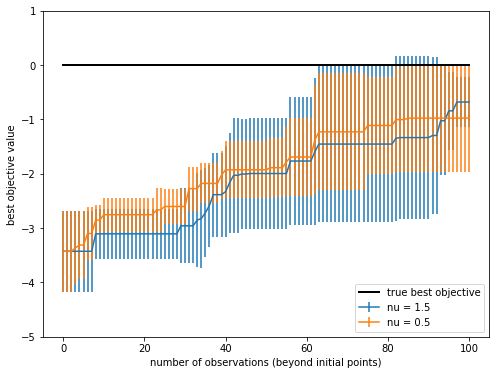

In [6]:
# plot results

def ci(y):
    return 1.96 * y.std(axis=0) / np.sqrt(N_TRIALS)


GLOBAL_MAXIMUM = 0.0


obs = np.arange(N_ITERS + 1) * N_CANDIDATES
y1 = np.asarray(best_values)
y2 = np.asarray(best_values_2)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.errorbar(obs, y1.mean(axis=0), yerr=ci(y1), label="nu = 1.5", linewidth=1.5)
ax.errorbar(obs, y2.mean(axis=0), yerr=ci(y2), label="nu = 0.5", linewidth=1.5)
plt.plot([0, N_ITERS * N_CANDIDATES], [GLOBAL_MAXIMUM] * 2, 'k', label="true best objective", linewidth=2)
ax.set_ylim(bottom=-5, top=1)
ax.set(xlabel='number of observations (beyond initial points)', ylabel='best objective value')
ax.legend(loc="lower right")